In [2]:
import pandas as pd
import numpy as np
import os

In [78]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
DATASET_DIR = ''
dir_name = './'
file_name = 'BigCitiesHealth.csv'

In [4]:
file_path = os.path.join(DATASET_DIR,dir_name,file_name)
df = pd.read_csv(file_path)

df.info()

C:\Users\Post Scriptum\AppData\Local\Temp\ipykernel_3628\664991473.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [5]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [6]:
df["metric_label"].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: metric_label, Length: 118, dtype: int64

3. value_ci 관련 col 확인

In [19]:
df['value_ci_flag_yesno'].value_counts()

yes    118682
no      71297
Name: value_ci_flag_yesno, dtype: int64

In [20]:
np.sum(df['value_ci_flag_yesno'].isna())

0

In [21]:
list(filter(lambda x: 'ci' in x,df.columns))

['geo_label_city',
 'geo_label_citystate',
 'value_ci_flag_yesno',
 'value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

In [136]:
df[['value_90_ci_high','value_90_ci_low']].info()
# 90% 신뢰구간은 무시해도 상관없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value_90_ci_high  0 non-null      float64
 1   value_90_ci_low   0 non-null      float64
dtypes: float64(2)
memory usage: 2.9 MB


In [23]:
df[['value_ci_flag_yesno',
    'value_95_ci_low',
 'value_95_ci_high']]

,value_ci_flag_yesno,value_95_ci_low,value_95_ci_high
0,yes,195.006700,225.194591
1,yes,124.494012,211.553695
2,yes,92.047403,101.613187
3,yes,88.474786,122.786969
4,yes,275.648062,320.086062
...,...,...,...
189974,no,NaN,NaN
189975,no,NaN,NaN
189976,no,NaN,NaN
189977,no,NaN,NaN


In [24]:
#flag = yes 일 경우 low, high 모두 존재
# no 일 경우 최소 1가지 이상 공백
col_list = ['value_95_ci_low',
 'value_95_ci_high']

cond1 = df[col_list].isna().all(axis=1)
cond2 = df['value_ci_flag_yesno'] == 'no'


cond3 = df[col_list].isna().any(axis=1)
cond4 = df['value_ci_flag_yesno'] == 'yes'

# np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

#둘중 하나만 있는 경우, 둘다 있는 경우, flag = yes인 경우
np.sum((~cond3) != cond4), np.sum(~cond3), np.sum(cond4)

(12, 118670, 118682)

In [25]:
#CI가 없는 컬럼 = 
len(df.loc[cond1,'metric_label'].unique())

117

In [26]:
# CI가 존재하는 컬럼 = 53개
len(df.loc[~cond1,'metric_label'].unique())

53

In [27]:
df.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [28]:
metric_w_ci = set(df.loc[~cond1,'metric_label'].unique())
metric_wo_ci = set(df.loc[cond1,'metric_label'].unique())

metric_w_ci.difference(metric_wo_ci)

df[df['metric_label'] == 'Deaths | Premature Death'][col_list]

,value_95_ci_low,value_95_ci_high
53717,12017.425830,15242.289810
53718,2826.211311,3559.397128
53719,3489.883205,4476.346755
53720,4595.894356,5792.166134
53721,2505.775241,5565.075217
...,...,...
60537,4241.048298,5255.674520
60538,5524.349193,6073.323131
60539,4977.678608,6442.037655
60540,5699.690746,6396.834812


In [29]:
len(metric_wo_ci.difference(metric_w_ci)), len(metric_wo_ci)

(65, 117)

In [30]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[:20]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                    

In [31]:
for col in metirc_null_ci[20:40]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [32]:
for col in metirc_null_ci[40:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Lead Poisoning | Child Lead Testing                                              :        361
Lead Poisoning | Housing Lead Risk                                               :        468
Life Expectancy at Birth | Life Expectancy                                       :       5004
Population | Children                                                            :        468
Population | Population Density                                                  :        455
Population | Seniors                                                             :        468
Population | Single-Parent Families                                              :       2218
Race/Ethnicity | Minority Population                                             :        468
Racial Segregation Indices | Racial Segregation, White and Asian                 :        468
Racial Segregation Indices | Racial Segregation, White and Black                 :        468
Racial Segregation Indices | Racial Segregation, White and H

### U.S. Total 분리

In [33]:
df['geo_label_city'].value_counts()

New York City    6535
Houston          6431
Los Angeles      6372
Philadelphia     6310
San Diego        6251
Chicago          6210
San Francisco    6121
Las Vegas        5849
Boston           5718
Oakland          5676
Dallas           5655
Fort Worth       5628
Seattle          5507
Phoenix          5437
Charlotte        5381
San Antonio      5349
Washington       5264
Portland         5219
Long Beach       5216
San Jose         5206
Austin           5198
Detroit          5160
Denver           5157
Cleveland        5113
Baltimore        5101
Oklahoma City    5030
Indianapolis     4916
Columbus         4907
Milwaukee        4881
Kansas City      4848
Tucson           4799
Memphis          4631
El Paso          4553
Louisville       4527
Minneapolis      4511
U.S. Total       1312
Name: geo_label_city, dtype: int64

In [34]:
cond0 = df['geo_label_city'] == 'U.S. Total'

df_US = df.loc[cond0].copy()
df_city = df.loc[~cond0].copy()

display(df_US.info())
display(df_city.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 5718 to 189943
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   metric_item_label                1312 non-null   object 
 1   metric_cat_label                 1312 non-null   object 
 2   metric_subcat_label              1312 non-null   object 
 3   metric_item_label_subtitle       1312 non-null   object 
 4   metric_cat_item_yaxis_label      1312 non-null   object 
 5   metric_source_desc_label_fn      1312 non-null   object 
 6   metric_source_desc_label_url_fn  1312 non-null   object 
 7   geo_label_city                   1312 non-null   object 
 8   geo_label_state                  0 non-null      object 
 9   geo_label_citystate              1312 non-null   object 
 10  geo_fips_code                    0 non-null      float64
 11  value                            1312 non-null   float64
 12  date_label     

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188667 entries, 0 to 189978
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                188667 non-null  object 
 1   metric_cat_label                 188667 non-null  object 
 2   metric_subcat_label              188667 non-null  object 
 3   metric_item_label_subtitle       188667 non-null  object 
 4   metric_cat_item_yaxis_label      188667 non-null  object 
 5   metric_source_desc_label_fn      188667 non-null  object 
 6   metric_source_desc_label_url_fn  188667 non-null  object 
 7   geo_label_city                   188667 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              188667 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            188667 non-null  float64
 12  da

None

In [35]:
cond1 = (df_city['strata_race_label'] == 'All') & (df_city['strata_sex_label'] == 'Both')
np.sum(cond1)

45437

In [36]:
col_list = ['value_95_ci_low',
 'value_95_ci_high',
 'value_90_ci_low',
 'value_90_ci_high']

#전부다 없는 경우
cond1 = df_city[col_list].isna().all(axis=1)

# flag = no 인 경우
cond2 = df_city['value_ci_flag_yesno'] == 'no'

np.sum(cond1 != cond2), np.sum(cond1), np.sum(cond2)

(0, 70183, 70183)

In [143]:
df_city.loc[cond1,'metric_label'].value_counts()

Life Expectancy at Birth | Life Expectancy               4992
Sexually Transmitted Disease | HIV/AIDS Prevalence       2897
Income | Poverty in Children                             2730
Income | Poverty in All Ages                             2730
Housing | Renters vs. Owners                             2730
                                                         ... 
Birth Control | Teen Birth Control                        128
School Violence | Weapons in School                       127
Physical Activity | Teen Physical Education               121
Respiratory Infection | COVID-19 Vaccination, Seniors      68
Respiratory Infection | COVID-19 Vaccination, Adults       68
Name: metric_label, Length: 84, dtype: int64

In [145]:
#하나라도 있는 경우
df_city.loc[~cond1,'metric_label'].value_counts()

Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6392
Deaths | Deaths from All Causes                           6231
Cancer | All Cancer Deaths                                6220
Cardiovascular Disease | Cardiovascular Disease Deaths    6182
Cardiovascular Disease | Heart Disease Deaths             6125
Diabetes and Obesity | Diabetes Deaths                    5476
Cancer | Lung Cancer Deaths                               5475
Substance Use | Drug Overdose Deaths                      5450
Mental Health | Suicide                                   5137
Deaths | Motor Vehicle Deaths                             5112
Cancer | Colorectal Cancer Deaths                         5044
Deaths | Gun Deaths (Firearms)                            4904
Respiratory Infection | Pneumonia or Influenza Deaths     4827
Substance Use | Opioid Overdose Deaths                    4814
Crime Incidents | Homicides                            

In [38]:
len(df_city.loc[~cond1,'metric_label'].value_counts())

53

In [147]:
metric_w_ci = set(df_city.loc[~cond1,'metric_label'].unique()) # 최소 한개에 대해 CI 있는
metric_wo_ci = set(df_city.loc[cond1,'metric_label'].unique()) # CI 없는

metric_w_ci.difference(metric_wo_ci)

{'Births | Low Birthweight',
 'Births | Prenatal Care',
 'Births | Preterm Births',
 'Births | Teen Births',
 'Cancer | All Cancer Deaths',
 'Cancer | Breast Cancer Deaths',
 'Cancer | Colorectal Cancer Deaths',
 'Cancer | Lung Cancer Deaths',
 'Cancer | Prostate Cancer Deaths',
 'Cardiovascular Disease | Cardiovascular Disease Deaths',
 'Cardiovascular Disease | Heart Disease Deaths',
 'Cardiovascular Disease | High Blood Pressure',
 'Crime Incidents | Homicides',
 'Deaths | Deaths from All Causes',
 'Deaths | Gun Deaths (Firearms)',
 'Deaths | Infant Deaths',
 'Deaths | Injury Deaths',
 'Deaths | Maternal Deaths',
 'Deaths | Motor Vehicle Deaths',
 'Deaths | Premature Death',
 'Diabetes and Obesity | Adult Obesity',
 'Diabetes and Obesity | Diabetes',
 'Diabetes and Obesity | Diabetes Deaths',
 'Mental Health | Adult Mental Distress',
 'Mental Health | Suicide',
 'Oral Health | Dental Care',
 'Physical Activity | Adult Physical Inactivity',
 'Respiratory Infection | COVID-19 Deaths',

In [40]:
#모든 레코드에 대해 CI 있는
metirc_full_ci = sorted(list(metric_w_ci.difference(metric_wo_ci)))

for col in metirc_full_ci[:20]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Births | Low Birthweight                                                         :       2275
Births | Prenatal Care                                                           :       2185
Births | Preterm Births                                                          :       1225
Births | Teen Births                                                             :       2235
Cancer | All Cancer Deaths                                                       :       6220
Cancer | Breast Cancer Deaths                                                    :       1773
Cancer | Colorectal Cancer Deaths                                                :       5044
Cancer | Lung Cancer Deaths                                                      :       5475
Cancer | Prostate Cancer Deaths                                                  :       1713
Cardiovascular Disease | Cardiovascular Disease Deaths                           :       6182
Cardiovascular Disease | Heart Disease Deaths               

In [41]:
for col in metirc_full_ci[20:]:
    cond = df_city['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Diabetes and Obesity | Adult Obesity                                             :        455
Diabetes and Obesity | Diabetes                                                  :        455
Diabetes and Obesity | Diabetes Deaths                                           :       5476
Mental Health | Adult Mental Distress                                            :        455
Mental Health | Suicide                                                          :       5137
Oral Health | Dental Care                                                        :        455
Physical Activity | Adult Physical Inactivity                                    :        455
Respiratory Infection | COVID-19 Deaths                                          :       1396
Respiratory Infection | Pneumonia or Influenza Deaths                            :       4827
Sexually Transmitted Disease | HIV-Related Deaths                                :       3368
Substance Use | Adult Binge Drinking                        

In [42]:
len(metirc_full_ci)

34

In [43]:
# CI 아예 없는 경우
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))
print(len(metirc_null_ci))

for col in metirc_null_ci:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

65
Active Transportation | Riding Bike to Work                                      :        468
Active Transportation | Walking to Work                                          :       2218
Air Pollution | Hazardous Air Quality                                            :        467
Air Pollution | Poor Air Quality                                                 :        467
Crime Incidents | Violent Crime                                                  :        454
Deaths | Police Killings                                                         :       1495
Deaths | Racial Disparity in Police Killings                                     :        455
Disability | People with Disabilities                                            :       2743
Education | College Graduates                                                    :       2743
Education | Preschool Enrollment                                                 :        468
Food Access | Limited Supermarket Access                 

In [44]:
metirc_null_ci = sorted(list(metric_wo_ci.difference(metric_w_ci)))

for col in metirc_null_ci[20:]:
    cond = df['metric_label'] == col
    print(col.ljust(75),f"     : {np.sum(cond):>10}")

Housing | Renters vs. Owners                                                     :       2743
Housing | Vacant Housing Units                                                   :        468
Housing | Vacant Housing and Homelessness                                        :        266
Income Inequality | Household Income Inequality                                  :        468
Income Inequality | Income Inequality                                            :        468
Income | Households with Higher-Incomes                                          :        468
Income | Per-capita Household Income                                             :       2743
Income | Poverty and Near Poverty in All Ages                                    :        468
Income | Poverty in All Ages                                                     :       2743
Income | Poverty in Children                                                     :       2743
Income-related | Excessive Housing Cost                     

In [45]:
table = pd.pivot_table(df_city, index=["geo_label_city","date_label"], values='value', columns=['metric_label'])

In [46]:
table[metirc_null_ci]

metric_label               Active Transportation | Riding Bike to Work  \
geo_label_city date_label                                                
Austin         2010                                           1.458997   
               2011                                           1.458997   
               2012                                           1.458997   
               2013                                           1.326730   
               2014                                           1.326730   
...                                                                ...   
Washington     2018                                           3.316120   
               2019                                           3.316120   
               2020                                           3.316120   
               2021                                           3.316120   
               2022                                           3.316120   

metric_label               Active Transportation | Walking to Work  \
geo_label_city date_label                                            
Austin         2010                                       2.506039   
               2011                                       2.506039   
               2012                                       2.506039   
               2013                                       2.184400   
               2014                                       2.184400   
...                                                            ...   
Washington     2018                                      10.525489   
               2019                                      10.525489   
               2020                                      10.525489   
               2021                                      10.525489   
               2022                                      10.525489   

metric_label               Air Pollution | Hazardous Air Quality  \
geo_label_city date_label                                          
Austin         2010                                     2.191781   
               2011                                     3.835616   
               2012                                     2.185792   
               2013                                     1.095890   
               2014                                     0.000000   
...                                                          ...   
Washington     2018                                     1.643836   
               2019                                     1.369863   
               2020                                     0.273224   
               2021                                     2.191781   
               2022                                     1.877934   

metric_label               Air Pollution | Poor Air Quality  \
geo_label_city date_label                                     
Austin         2010                               25.479452   
               2011                               38.356164   
               2012                               31.967213   
               2013                               31.780822   
               2014                               31.780822   
...                                                     ...   
Washington     2018                               35.616438   
               2019                               33.698630   
               2020                               14.207650   
               2021                               30.958904   
               2022                               28.169014   

metric_label               Crime Incidents | Violent Crime  \
geo_label_city date_label                                    
Austin         2010                             475.945298   
               2011                             430.099799   
               2012                             408.812092   
               2013                             363.486115   
               2014                             3

In [47]:
null_count = table.groupby(by=["geo_label_city", "date_label"])[metirc_null_ci].count()

null_count 
# null_count_city = 

metric_label               Active Transportation | Riding Bike to Work  \
geo_label_city date_label                                                
Austin         2010                                                  1   
               2011                                                  1   
               2012                                                  1   
               2013                                                  1   
               2014                                                  1   
...                                                                ...   
Washington     2018                                                  1   
               2019                                                  1   
               2020                                                  1   
               2021                                                  1   
               2022                                                  1   

metric_label               Active Transportation | Walking to Work  \
geo_label_city date_label                                            
Austin         2010                                              1   
               2011                                              1   
               2012                                              1   
               2013                                              1   
               2014                                              1   
...                                                            ...   
Washington     2018                                              1   
               2019                                              1   
               2020                                              1   
               2021                                              1   
               2022                                              1   

metric_label               Air Pollution | Hazardous Air Quality  \
geo_label_city date_label                                          
Austin         2010                                            1   
               2011                                            1   
               2012                                            1   
               2013                                            1   
               2014                                            1   
...                                                          ...   
Washington     2018                                            1   
               2019                                            1   
               2020                                            1   
               2021                                            1   
               2022                                            1   

metric_label               Air Pollution | Poor Air Quality  \
geo_label_city date_label                                     
Austin         2010                                       1   
               2011                                       1   
               2012                                       1   
               2013                                       1   
               2014                                       1   
...                                                     ...   
Washington     2018                                       1   
               2019                                       1   
               2020                                       1   
               2021                                       1   
               2022                                       1   

metric_label               Crime Incidents | Violent Crime  \
geo_label_city date_label                                    
Austin         2010                                      1   
               2011                                      1   
               2012                                      1   
               2013                                      1   
               2014                              

In [48]:
df_city[col_list].isna().astype(int)

,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
189974,1,1,1,1
189975,1,1,1,1
189976,1,1,1,1
189977,1,1,1,1


In [50]:
col_list = ["value_95_ci_low", "value_95_ci_high"]

In [55]:
#CI가 null인것 구하기 위한 함수
def get_nullcount(df,groupby,cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    return grouped.count().rsub(grouped.size(),axis=0)

#CI가 null인것/전체 비율 구하기 위한 함수
def get_nullprop(df,groupby, cols=None):
    grouped = df.groupby(groupby)
    if cols:
        grouped = grouped[cols]
    count = grouped.size().to_frame()
    count = pd.concat([count] * 2, axis=1)
    count.columns = ["value_95_ci_high", "value_95_ci_low"]
    return count.rdiv(get_nullcount(df,groupby,cols=cols))

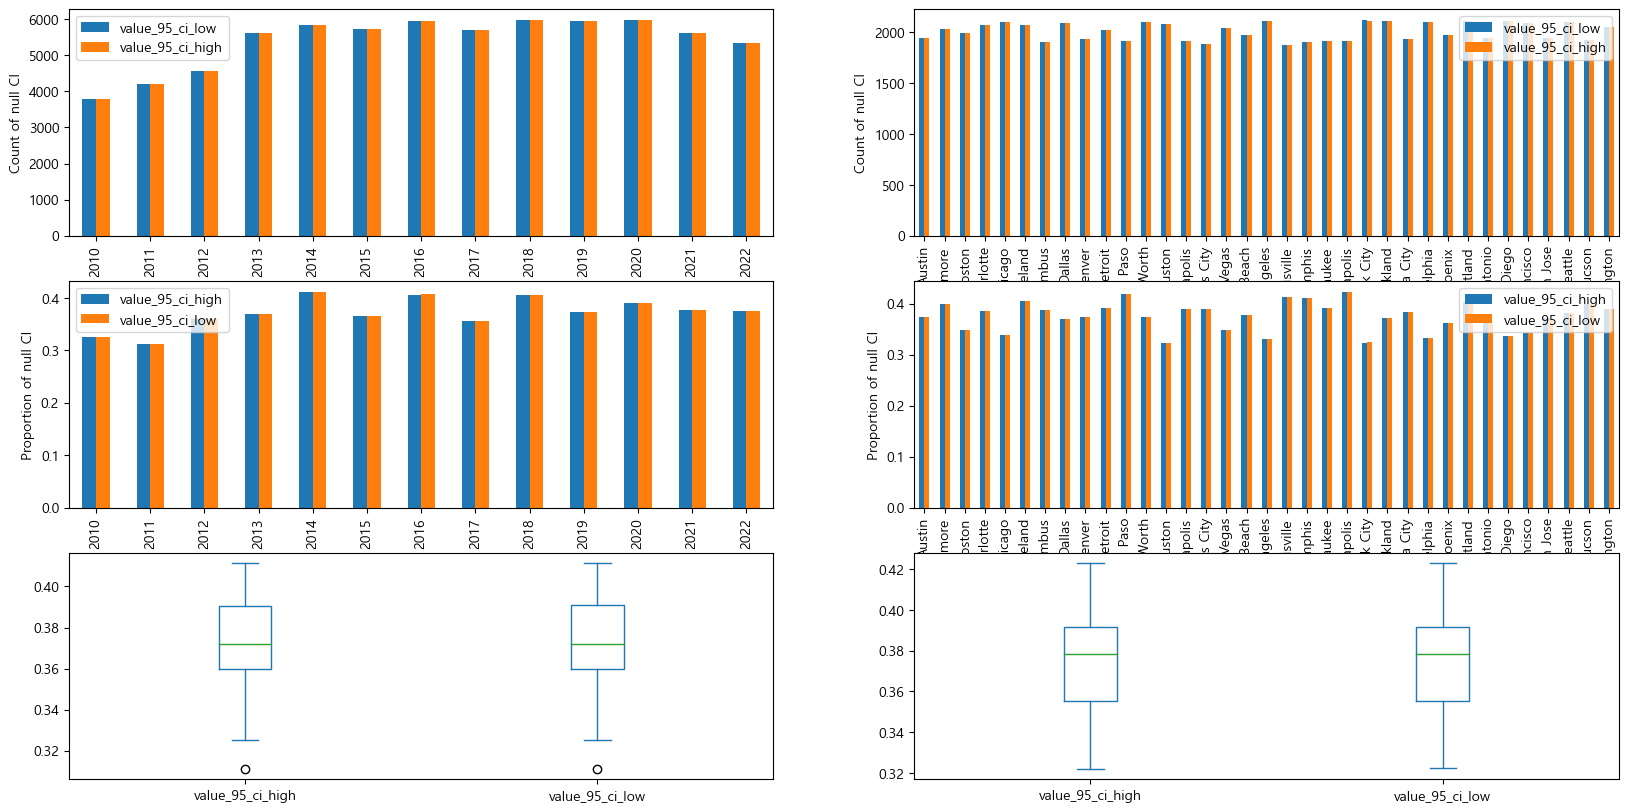

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(20,10))

# 연도별 CI가 null 인것 count
null_count_year = get_nullcount(df_city,"date_label",col_list)
null_count_year.plot.bar(ax=axes[0][0])
axes[0][0].set(xlabel="Year", ylabel="Count of null CI")

# 연도 별 CI가 null / 전체 비율
null_prop_year = get_nullprop(df_city,"date_label",col_list) #count_year.rdiv(null_count_year, axis=0)
null_prop_year.plot.bar(ax=axes[1][0])
null_prop_year.plot.box(ax=axes[2][0])
axes[1][0].set(xlabel="Year", ylabel="Proportion of null CI")

# 도시별 CI가 null 인것 count
null_count_city = get_nullcount(df_city,"geo_label_city",col_list) #df_city.groupby("geo_label_city")[col_list].count().rsub(df_city.groupby("geo_label_city")[col_list].size(), axis=0)
null_count_city.plot.bar(ax=axes[0][1])
axes[0][1].set(xlabel="City", ylabel="Count of null CI")

# 도시 별 CI가 null / 전체 비율
null_prop_city = get_nullprop(df_city,"geo_label_city",col_list)
null_prop_city.plot.bar(ax=axes[1][1])
null_prop_city.plot.box(ax=axes[2][1])
axes[1][1].set(xlabel="City", ylabel="Proportion of null CI")

plt.show()

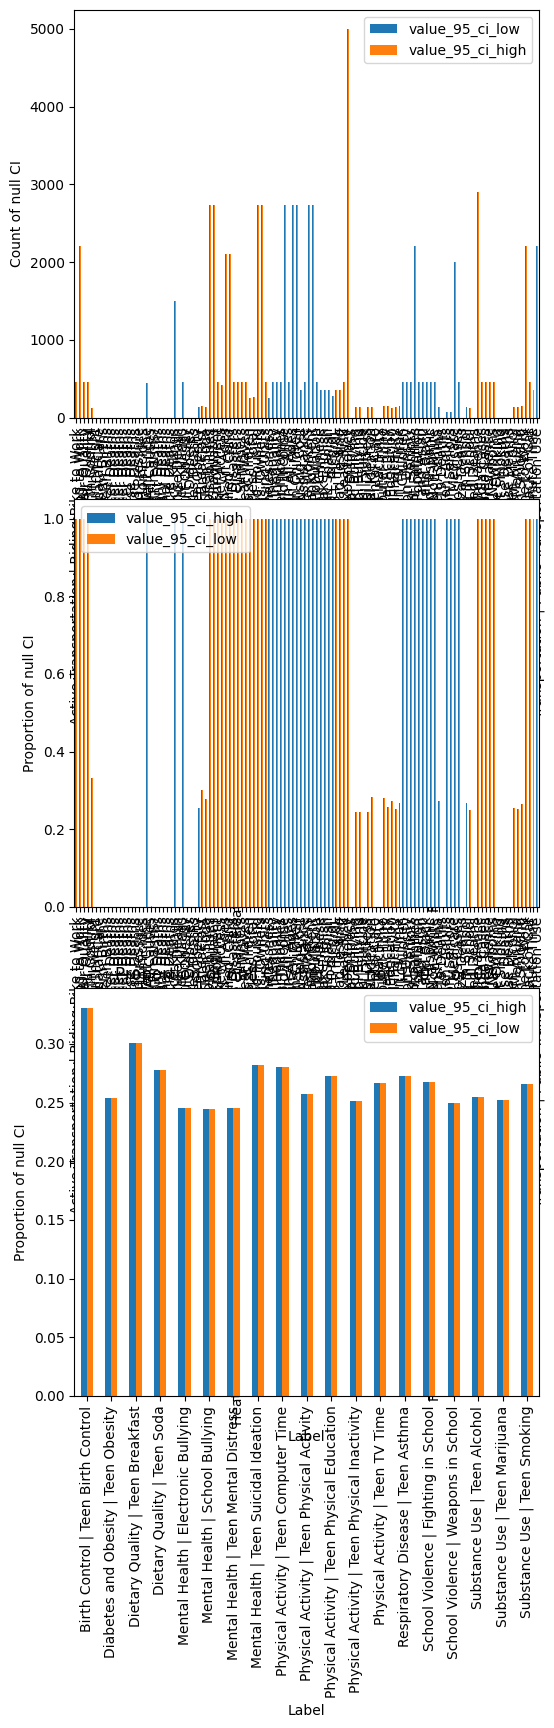

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1,figsize=(6,18))


# Metric_label 별 CI 가 null인것 count
null_count_label = get_nullcount(df_city,"metric_label",cols=col_list)
null_count_label.plot.bar(ax=axes[0])
axes[0].set(xlabel="Label", ylabel="Count of null CI")

# Metric_label 별 CI 가 null인것 비율
null_prop_label = get_nullprop(df_city,"metric_label",cols=col_list) 
null_prop_label.plot.bar(ax=axes[1])
axes[1].set(xlabel="Label", ylabel="Proportion of null CI")

# Metric_label 별 CI 가 null인것 중 0% 또는 100%가 아닌 것의 비율
null_some_label = null_prop_label[(null_prop_label['value_95_ci_high'] != 1.0) & null_prop_label['value_95_ci_high'] != 0.0]
null_some_label.plot.bar(ax=axes[2])
axes[2].set(xlabel="Label", ylabel="Proportion of null CI", title="Proportion of null CI where its not 100% or 0%")

plt.show()

In [58]:
# ci_low 와 ci_high의 null 값 갯수가 다른것
null_count_label[null_count_label['value_95_ci_high'].notna() & (null_count_label['value_95_ci_high'] != null_count_label['value_95_ci_low'])]

,value_95_ci_low,value_95_ci_high
metric_label,,
Deaths | Deaths from All Causes,12,0


In [59]:
# 일부 레코드만 CI가 없는 항목들의 갯수 = 19
len(null_some_label.index.to_list())

19

<AxesSubplot: xlabel='geo_label_city'>

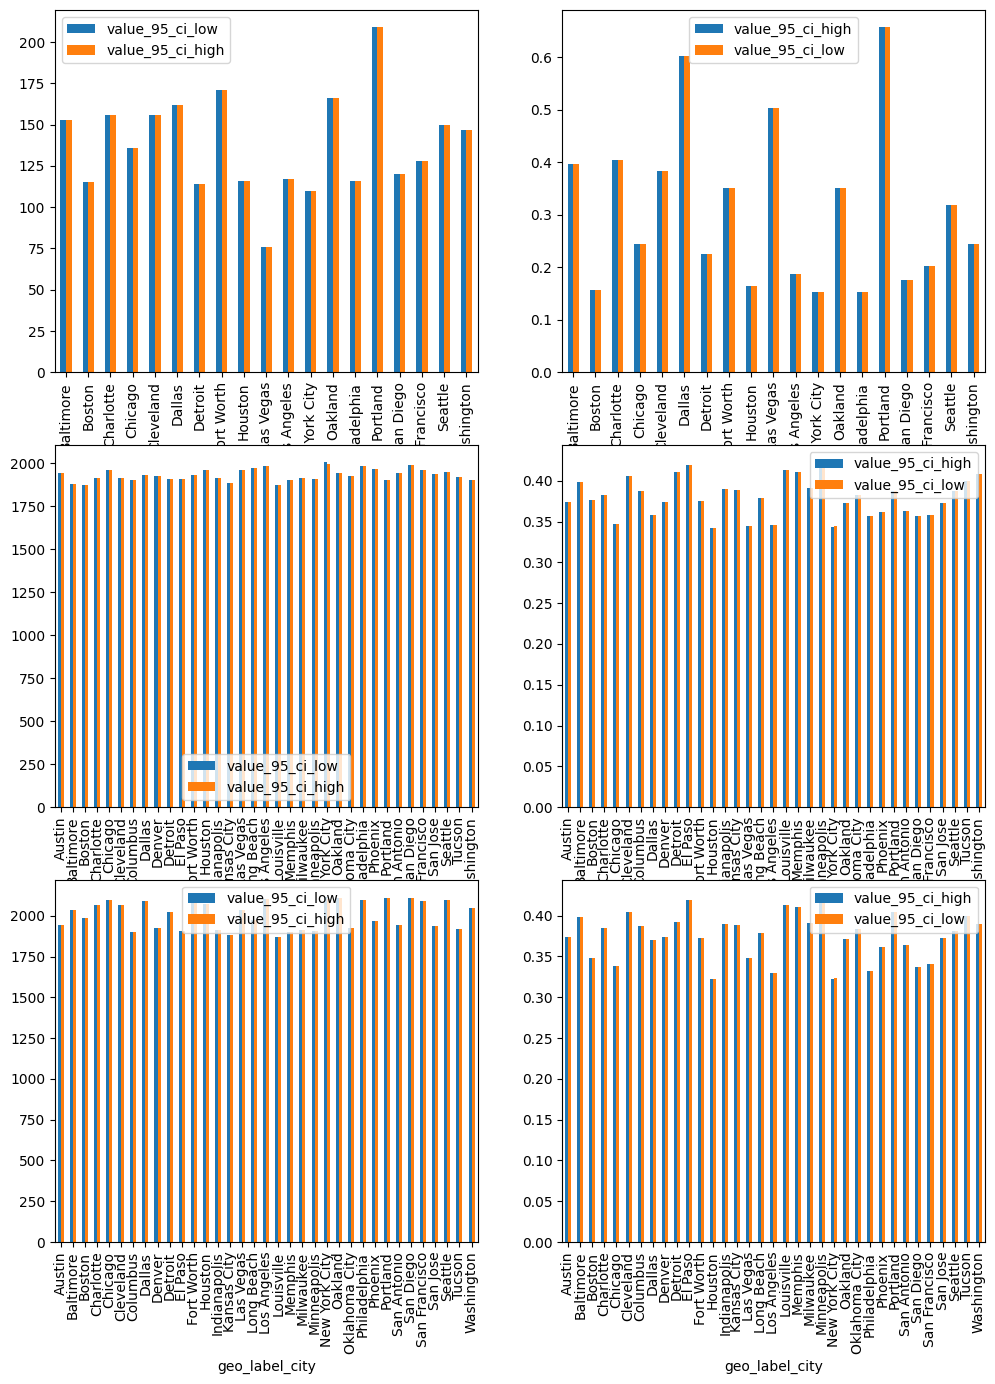

In [60]:
# CI null 비율이 0/1이 아닌것에 대한 연도/도시 세부 파악

fig, axes = plt.subplots(3,2,figsize=(12,16))
df_somena = df_city[df_city["metric_label"].isin(null_some_label.index.to_list())]
df_all_or_nothing = df_city[~df_city["metric_label"].isin(null_some_label.index.to_list())]


get_nullcount(df_somena, "geo_label_city", cols=col_list).plot.bar(ax=axes[0][0])
get_nullprop(df_somena, "geo_label_city", cols=col_list).plot.bar(ax=axes[0][1])
axes[0][0].set(title="")

get_nullcount(df_all_or_nothing, "geo_label_city", cols=col_list).plot.bar(ax=axes[1][0])
get_nullprop(df_all_or_nothing, "geo_label_city", cols=col_list).plot.bar(ax=axes[1][1])


get_nullcount(df_city, "geo_label_city", cols=col_list).plot.bar(ax=axes[2][0])
get_nullprop(df_city, "geo_label_city", cols=col_list).plot.bar(ax=axes[2][1])


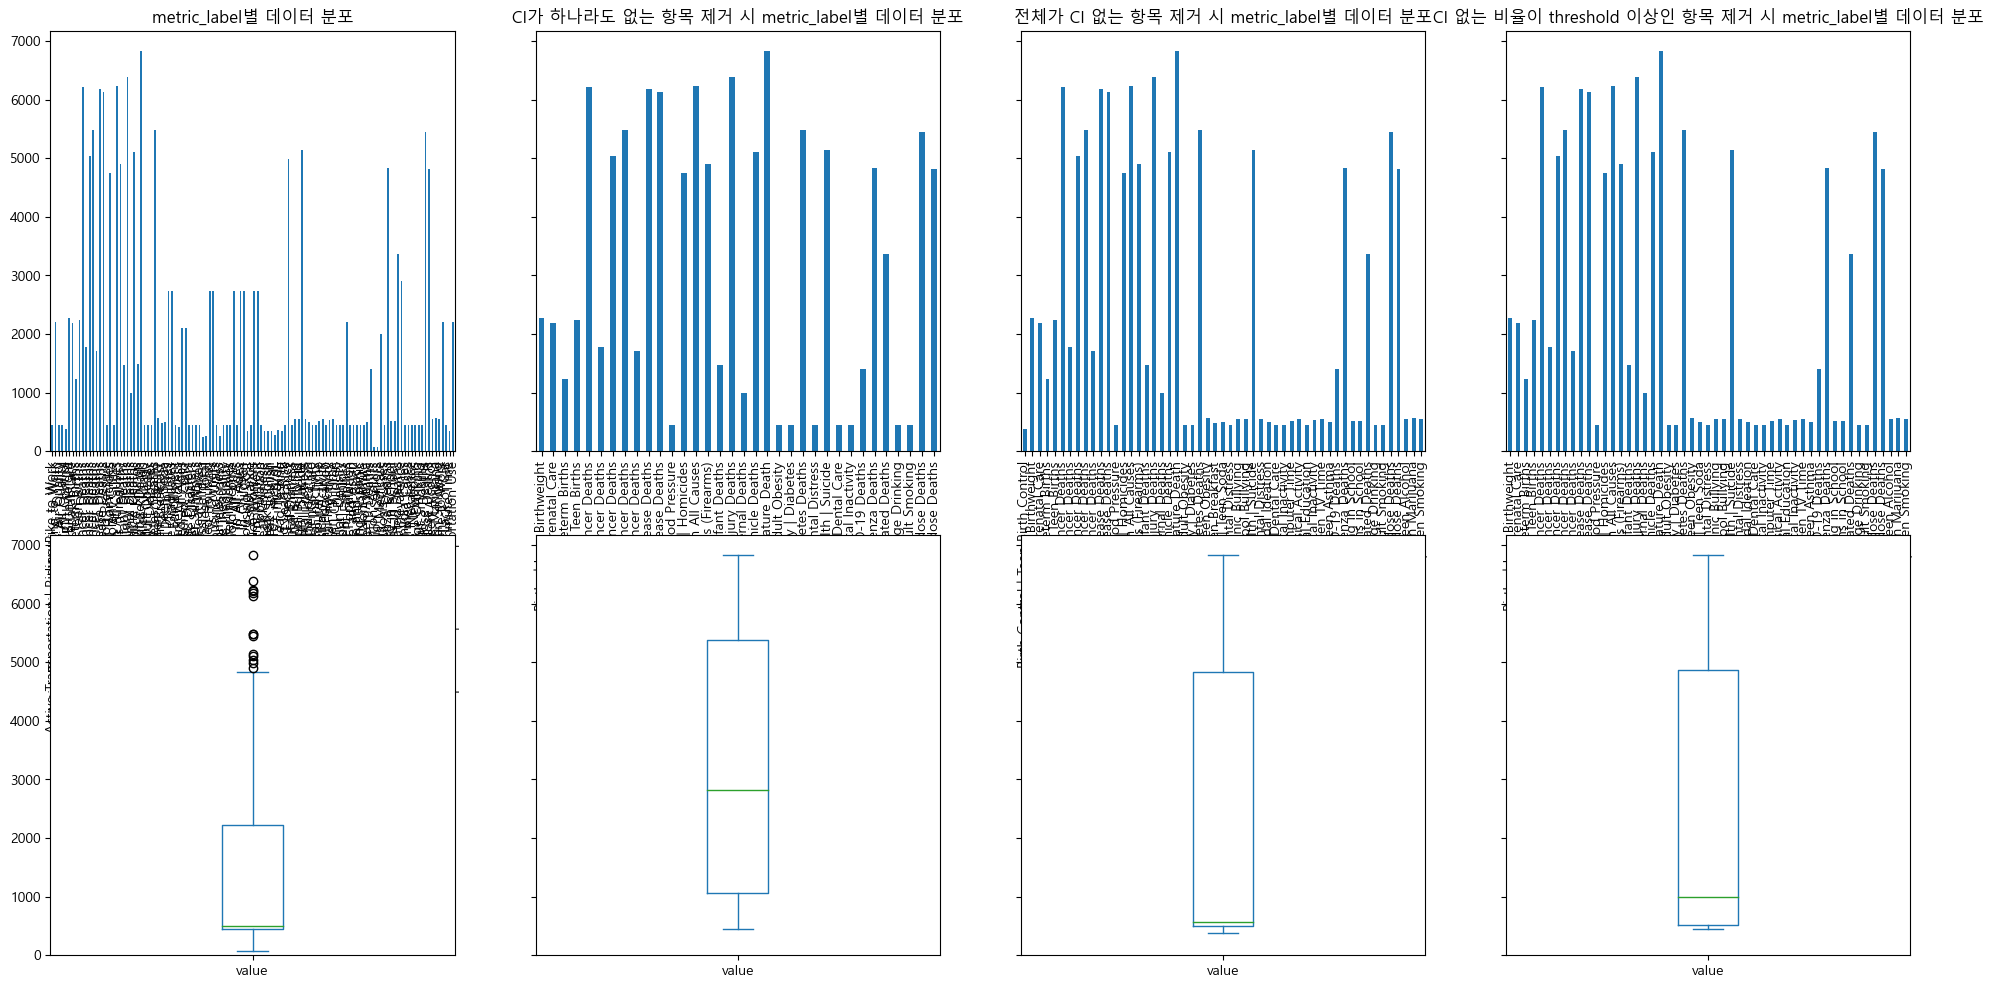

In [88]:
fig, axes = plt.subplots(2,4,figsize=(24,12),sharey=True)

# CI가 null인 레코드가 하나라도 있으면
null_any_label = null_prop_label[(null_prop_label['value_95_ci_high'] > 0.0)]
null_all_label = null_prop_label[(null_prop_label['value_95_ci_high'] == 1.0)]
null_thresh_label = null_prop_label[(null_prop_label['value_95_ci_high'] > 0.3)]
# CI가 0 이상인 데이터를 다 지웠을떄 분포차이가 생기는지?

df_nona = df_city[~df_city["metric_label"].isin(null_any_label.index.to_list())]
df_nofullna = df_city[~df_city["metric_label"].isin(null_all_label.index.to_list())]

labelwise_counts = df_city.groupby(["metric_label"])["value"].size()
nona_counts = df_nona.groupby(["metric_label"])["value"].size()
# CI가 1인 데이터만 다 지웠을때랑 비교하면?
nofullna_counts = df_nofullna.groupby(["metric_label"])["value"].size()

labelwise_counts.plot.bar(ax=axes[0][0])
axes[0][0].set(title="metric_label별 데이터 분포")
nona_counts.plot.bar(ax=axes[0][1])
axes[0][1].set(title="CI가 하나라도 없는 항목 제거 시 metric_label별 데이터 분포")
nofullna_counts.plot.bar(ax=axes[0][2])
axes[0][2].set(title="전체가 CI 없는 항목 제거 시 metric_label별 데이터 분포")

labelwise_counts.plot.box(ax=axes[1][0])
nona_counts.plot.box(ax=axes[1][1])
nofullna_counts.plot.box(ax=axes[1][2])

df_thresh = df_city[~df_city["metric_label"].isin(null_thresh_label.index.to_list())]
thresh_counts = df_thresh.groupby(["metric_label"])["value"].size()
thresh_counts.plot.bar(ax=axes[0][3])
axes[0][3].set(title="CI 없는 비율이 threshold 이상인 항목 제거 시 metric_label별 데이터 분포")
thresh_counts.plot.box(ax=axes[1][3])


plt.show()

In [62]:
null_all_label.index.to_list()

['Active Transportation | Riding Bike to Work',
 'Active Transportation | Walking to Work',
 'Air Pollution | Hazardous Air Quality',
 'Air Pollution | Poor Air Quality',
 'Crime Incidents | Violent Crime',
 'Deaths | Police Killings',
 'Deaths | Racial Disparity in Police Killings',
 'Disability | People with Disabilities',
 'Education | College Graduates',
 'Education | Preschool Enrollment',
 'Food Access | Limited Supermarket Access',
 'Health Insurance | Uninsured, All Ages',
 'Health Insurance | Uninsured, Child',
 'Heat and Disasters | Climate-related  Disasters',
 'Heat and Disasters | Community Social Vulnerability to Climate Disasters',
 'Heat and Disasters | Longer Summers',
 'Heat and Disasters | Number of Heat Waves',
 'Housing | Homeless, Children',
 'Housing | Homeless, Total',
 'Housing | Owner Occupied Housing',
 'Housing | Renters vs. Owners',
 'Housing | Vacant Housing Units',
 'Housing | Vacant Housing and Homelessness',
 'Income Inequality | Household Income Inequa

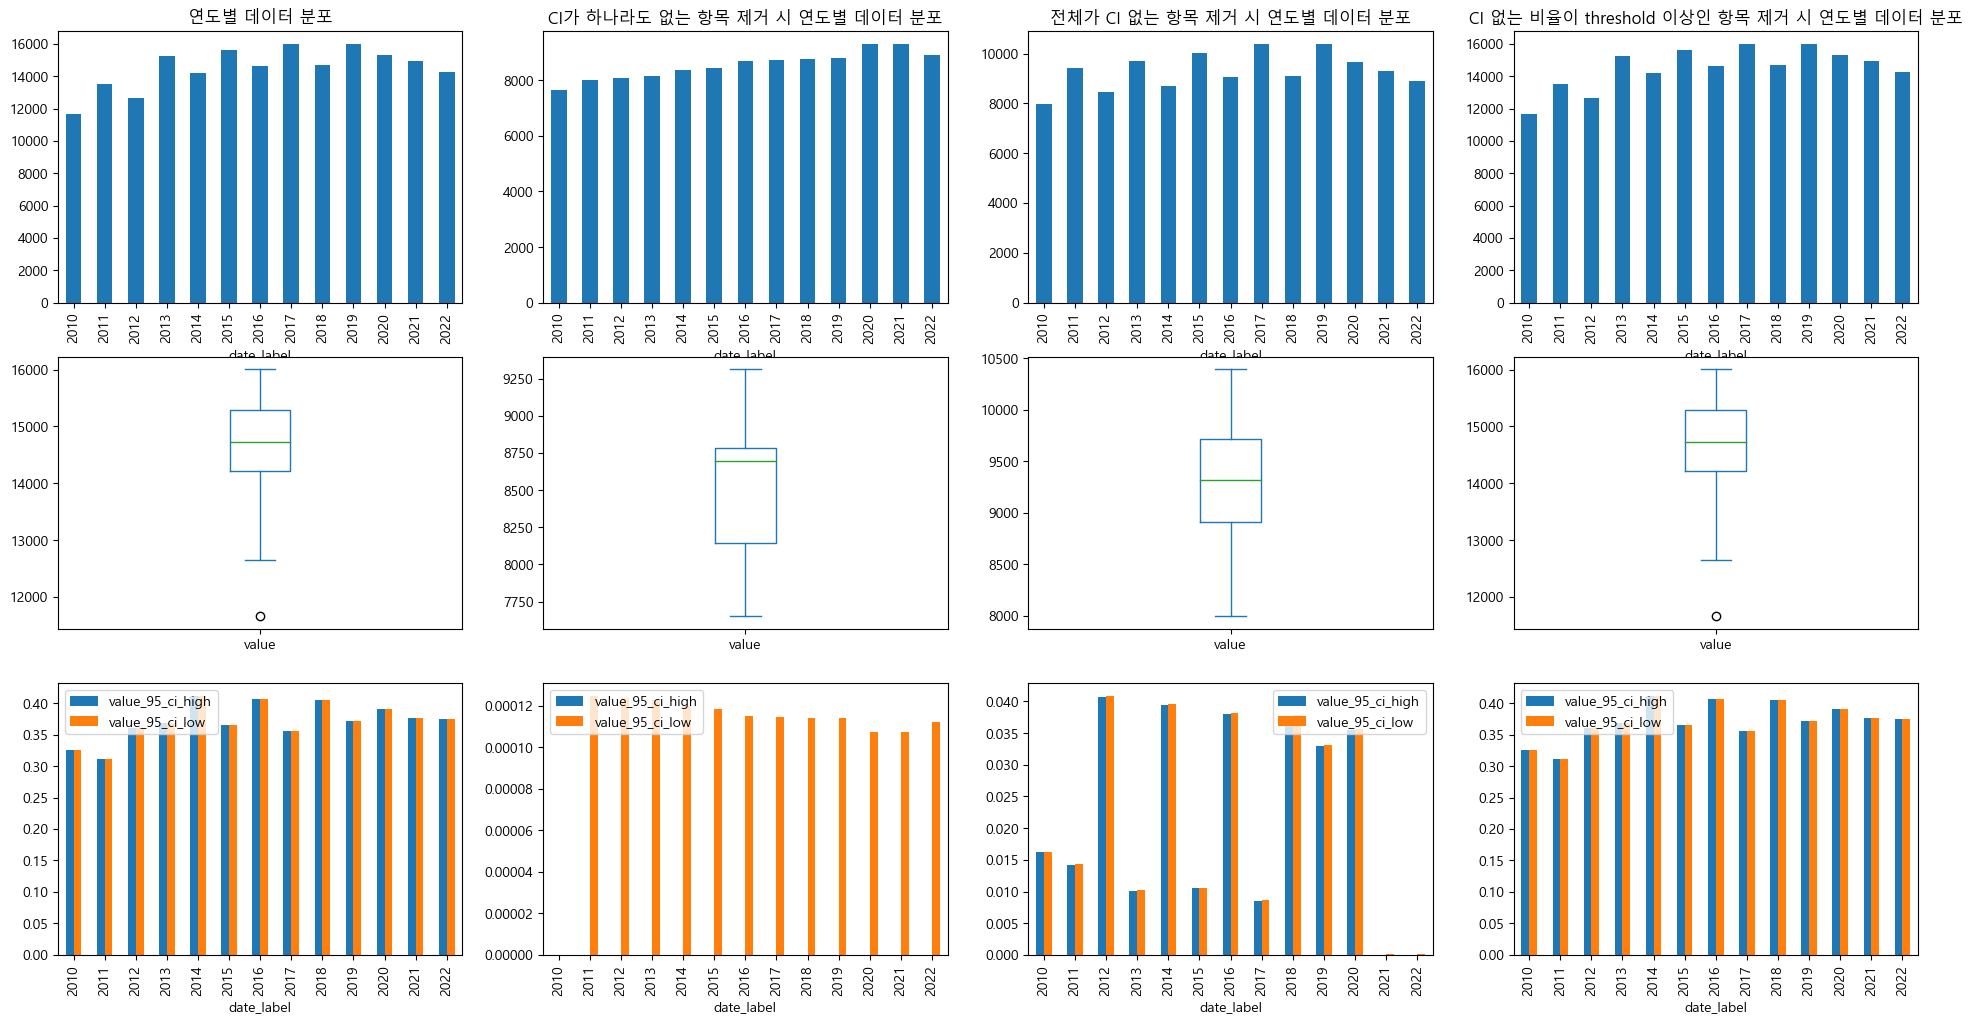

In [155]:
fig, axes = plt.subplots(3,4,figsize=(24,12))

# CI가 null인 레코드가 하나라도 있으면
null_any_label = null_prop_label[(null_prop_label['value_95_ci_high'] > 0.0)]
# 모든 레코드의 CI가 null이면
null_all_label = null_prop_label[(null_prop_label['value_95_ci_high'] == 1.0)]

# CI null rate가 0 이상인 데이터를 다 지웠을떄 분포차이가 생기는지?
df_nona = df_city[~df_city["metric_label"].isin(null_any_label.index.to_list())]

# CI null rate가 1인 데이터만 다 지웠을때랑 비교하면?
df_nofullna = df_city[~df_city["metric_label"].isin(null_all_label.index.to_list())]

citywise_counts = df_city.groupby(["date_label"])["value"].size()
nona_counts = df_nona.groupby(["date_label"])["value"].size()

nofullna_counts = df_nofullna.groupby(["date_label"])["value"].size()

citywise_counts.plot.bar(ax=axes[0][0])
axes[0][0].set(title="연도별 데이터 분포")
nona_counts.plot.bar(ax=axes[0][1])
axes[0][1].set(title="CI가 하나라도 없는 항목 제거 시 연도별 데이터 분포")
nofullna_counts.plot.bar(ax=axes[0][2])
axes[0][2].set(title="전체가 CI 없는 항목 제거 시 연도별 데이터 분포")

citywise_counts.plot.box(ax=axes[1][0])
nona_counts.plot.box(ax=axes[1][1])
nofullna_counts.plot.box(ax=axes[1][2])

df_thresh = df_city[~df_city["date_label"].isin(null_thresh_label.index.to_list())]
thresh_counts = df_thresh.groupby(["date_label"])["value"].size()
thresh_counts.plot.bar(ax=axes[0][3])
axes[0][3].set(title="CI 없는 비율이 threshold 이상인 항목 제거 시 연도별 데이터 분포")
thresh_counts.plot.box(ax=axes[1][3])

# axes[0][1].sharey(axes[0][0])
# axes[0][2].sharey(axes[0][0])
# axes[0][3].sharey(axes[0][0])

get_nullprop(df_city,"date_label",cols=col_list).plot.bar(ax=axes[2][0])
get_nullprop(df_nona,"date_label",cols=col_list).plot.bar(ax=axes[2][1])
get_nullprop(df_nofullna,"date_label",cols=col_list).plot.bar(ax=axes[2][2])
get_nullprop(df_thresh,"date_label",cols=col_list).plot.bar(ax=axes[2][3])

plt.show()

In [191]:
df_nona.groupby("date_label").size()

date_label
2010    7650
2011    8028
2012    8099
2013    8146
2014    8366
2015    8436
2016    8699
2017    8732
2018    8764
2019    8786
2020    9310
2021    9313
2022    8906
dtype: int64

In [193]:
get_nullcount(df_nona,"date_label",cols=col_list)

,value_95_ci_low,value_95_ci_high
date_label,,
2010,0,0
2011,1,0
2012,1,0
2013,1,0
2014,1,0
2015,1,0
2016,1,0
2017,1,0
2018,1,0


In [178]:
# 각 연도별로 데이터가 있는지 확인하는 함수 정의
def check_data_by_year(df_city, year):
    # year_column = f'{year}'
    return df_city[df_city['date_label'] == year].notnull().any()

# 각 연도별로 데이터가 있는지 출력
years_to_check = range(2010, 2013) 
for year in years_to_check:
    if check_data_by_year(df_city, year).any():
        print(f'Data exists for year {year}')
    else:
        print(f'No data for year {year}')

Data exists for year 2010
Data exists for year 2011
Data exists for year 2012


In [153]:
get_nullprop(df_city,"date_label",cols=col_list)

,value_95_ci_high,value_95_ci_low
date_label,,
2010,0.325384,0.325384
2011,0.311121,0.311195
2012,0.359864,0.359943
2013,0.368151,0.368217
2014,0.411301,0.411371
2015,0.365838,0.365902
2016,0.406212,0.406280
2017,0.356264,0.356326
2018,0.404781,0.404849


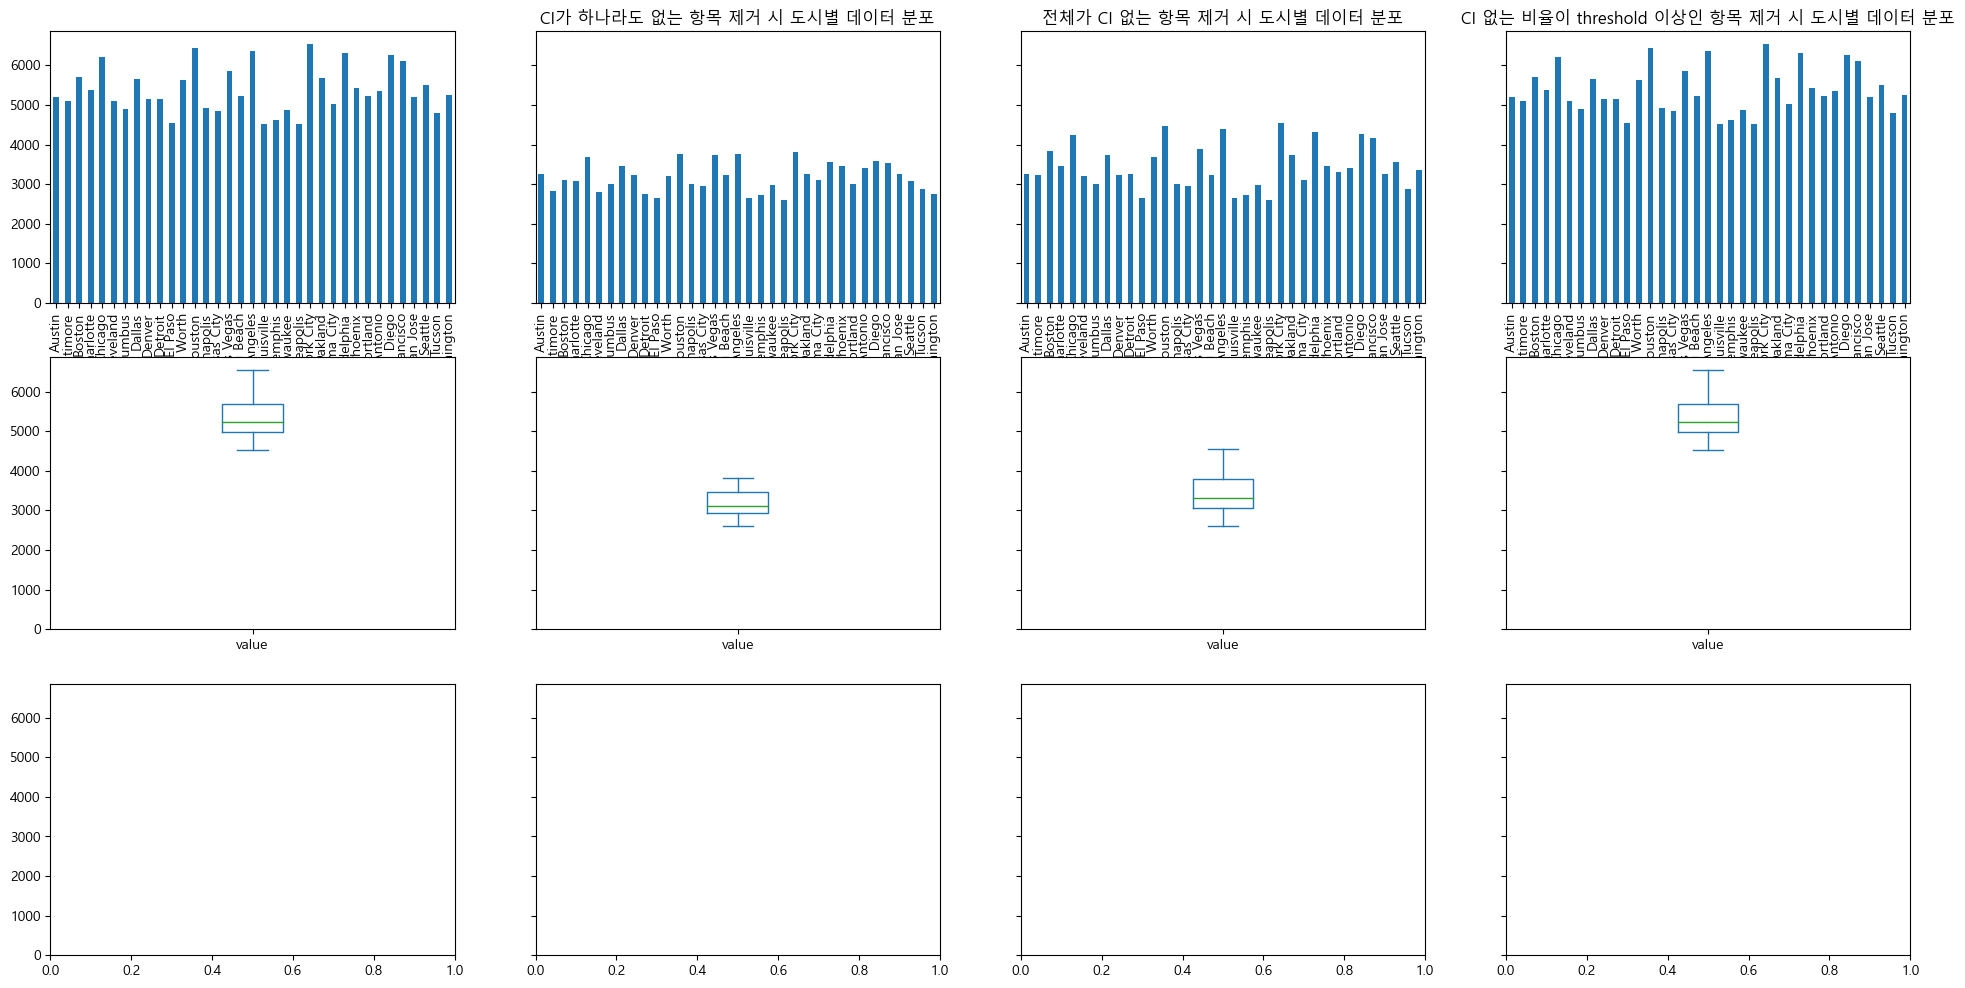

In [103]:
fig, axes = plt.subplots(3,4,figsize=(24,12),sharey=True)

# CI가 null인 레코드가 하나라도 있으면
null_any_label = null_prop_label[(null_prop_label['value_95_ci_high'] > 0.0)]
null_all_label = null_prop_label[(null_prop_label['value_95_ci_high'] == 1.0)]
# CI가 0 이상인 데이터를 다 지웠을떄 분포차이가 생기는지?

df_nona = df_city[~df_city["metric_label"].isin(null_any_label.index.to_list())]
df_nofullna = df_city[~df_city["metric_label"].isin(null_all_label.index.to_list())]

citywise_counts = df_city.groupby(["geo_label_city"])["value"].size()
nona_counts = df_nona.groupby(["geo_label_city"])["value"].size()
# CI가 1인 데이터만 다 지웠을때랑 비교하면?
nofullna_counts = df_nofullna.groupby(["geo_label_city"])["value"].size()

citywise_counts.plot.bar(ax=axes[0][0])

nona_counts.plot.bar(ax=axes[0][1])
axes[0][1].set(title="CI가 하나라도 없는 항목 제거 시 도시별 데이터 분포")
nofullna_counts.plot.bar(ax=axes[0][2])
axes[0][2].set(title="전체가 CI 없는 항목 제거 시 도시별 데이터 분포")

citywise_counts.plot.box(ax=axes[1][0])
nona_counts.plot.box(ax=axes[1][1])
nofullna_counts.plot.box(ax=axes[1][2])

df_thresh = df_city[~df_city["geo_label_city"].isin(null_thresh_label.index.to_list())]
thresh_counts = df_thresh.groupby(["geo_label_city"])["value"].size()
thresh_counts.plot.bar(ax=axes[0][3])
axes[0][3].set(title="CI 없는 비율이 threshold 이상인 항목 제거 시 도시별 데이터 분포")
thresh_counts.plot.box(ax=axes[1][3])

plt.show()

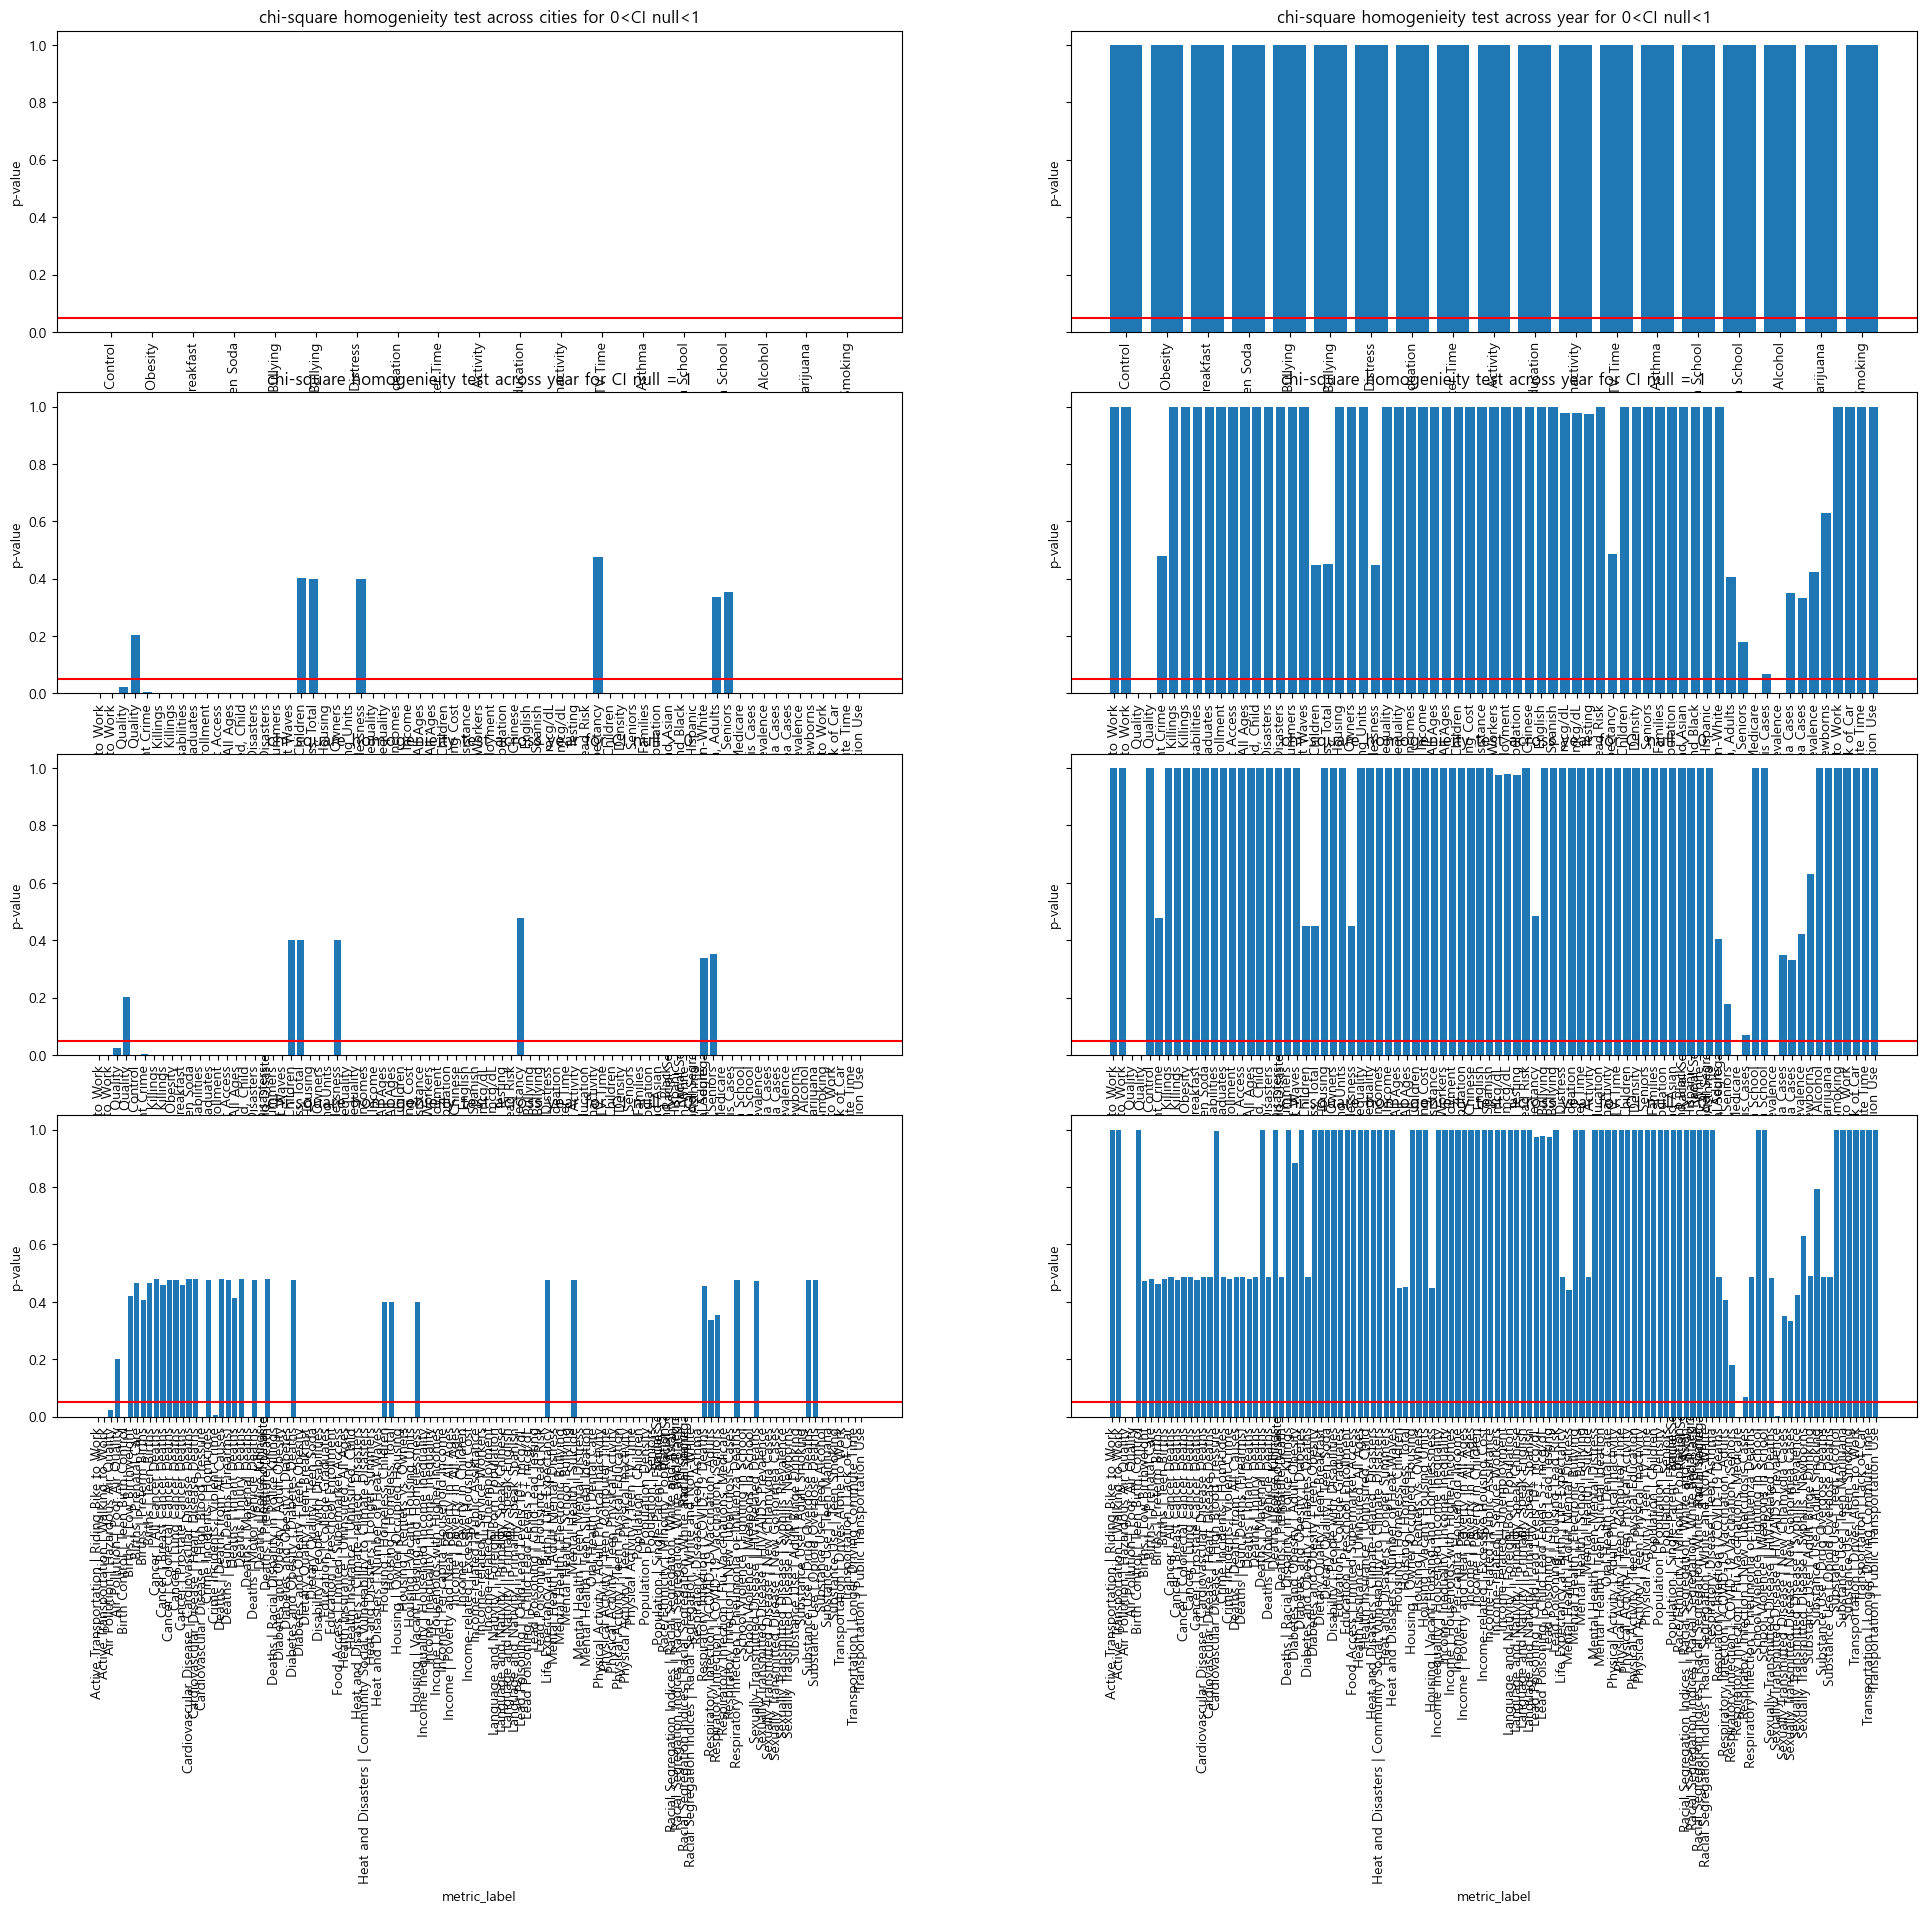

In [135]:
#값의 분포 확인

from scipy.stats import chi2_contingency

fig, axes = plt.subplots(4,2,figsize=(24,18),sharey=True)

data_somena_city=[]
data_somena_year=[]
data_allna_city=[]
data_allna_year=[]
data_anyna_city=[]
data_anyna_year=[]
data_all_city=[]
data_all_year=[]

for col in null_some_label.index:
    target_df = df_city[df_city["metric_label"] == col]
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["geo_label_city"],target_df["value"]))
    data_somena_city.append((col,p))

    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["date_label"],target_df["value"]))
    data_somena_year.append((col,p))

for col in null_all_label.index:
    target_df = df_city[df_city["metric_label"] == col]
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["geo_label_city"],target_df["value"]))
    data_allna_city.append((col,p))

    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["date_label"],target_df["value"]))
    data_allna_year.append((col,p))

for col in null_any_label.index:
    target_df = df_city[df_city["metric_label"] == col]
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["geo_label_city"],target_df["value"]))
    data_anyna_city.append((col,p))

    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["date_label"],target_df["value"]))
    data_anyna_year.append((col,p))

for col in null_prop_label.index:
    target_df = df_city[df_city["metric_label"] == col]
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["geo_label_city"],target_df["value"]))
    data_all_city.append((col,p))

    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["date_label"],target_df["value"]))
    data_all_year.append((col,p))

# p < 0.05 -> same distribution

axes[0][0].bar(*zip(*data_somena_city))
axes[0][0].axhline(y=0.05,color='r',linestyle='-')
axes[0][0].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across cities for 0<CI null<1")
axes[0][0].tick_params(axis='x', rotation=90)
axes[0][1].bar(*zip(*data_somena_year))
axes[0][1].axhline(y=0.05,color='r',linestyle='-')
axes[0][1].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for 0<CI null<1")
axes[0][1].tick_params(axis='x', rotation=90)

axes[1][0].bar(*zip(*data_allna_city))
axes[1][0].axhline(y=0.05,color='r',linestyle='-')
axes[1][0].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null = 1")
axes[1][0].tick_params(axis='x', rotation=90)
axes[1][1].bar(*zip(*data_allna_year))
axes[1][1].axhline(y=0.05,color='r',linestyle='-')
axes[1][1].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null = 1")
axes[1][1].tick_params(axis='x', rotation=90)

axes[2][0].bar(*zip(*data_anyna_city))
axes[2][0].axhline(y=0.05,color='r',linestyle='-')
axes[2][0].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null > 0")
axes[2][0].tick_params(axis='x', rotation=90)
axes[2][1].bar(*zip(*data_anyna_year))
axes[2][1].axhline(y=0.05,color='r',linestyle='-')
axes[2][1].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null > 0")
axes[2][1].tick_params(axis='x', rotation=90)

axes[3][0].bar(*zip(*data_all_city))
axes[3][0].axhline(y=0.05,color='r',linestyle='-')
axes[3][0].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null > 0")
axes[3][0].tick_params(axis='x', rotation=90)
axes[3][1].bar(*zip(*data_all_year))
axes[3][1].axhline(y=0.05,color='r',linestyle='-')
axes[3][1].set(xlabel="metric_label",ylabel="p-value",title="chi-square homogenieity test across year for CI null > 0")
axes[3][1].tick_params(axis='x', rotation=90)

In [122]:
for col in null_any_label.index:
    target_df = df_city[df_city["metric_label"] == col]
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(target_df["geo_label_city"],target_df["value"]))
    print(col, p)

Active Transportation | Riding Bike to Work 0.0
Active Transportation | Walking to Work 0.0
Air Pollution | Hazardous Air Quality 0.023901757430979616
Air Pollution | Poor Air Quality 0.20227140183875986
Birth Control | Teen Birth Control 3.961644258468998e-96
Crime Incidents | Violent Crime 0.005099719231016227
Deaths | Police Killings 0.0
Deaths | Racial Disparity in Police Killings 0.0
Diabetes and Obesity | Teen Obesity 8.862728832996296e-102
Dietary Quality | Teen Breakfast 8.774105618729373e-104
Dietary Quality | Teen Soda 7.585803175544919e-116
Disability | People with Disabilities 0.0
Education | College Graduates 0.0
Education | Preschool Enrollment 0.0
Food Access | Limited Supermarket Access 0.0
Health Insurance | Uninsured, All Ages 0.0
Health Insurance | Uninsured, Child 0.0
Heat and Disasters | Climate-related  Disasters 0.0
Heat and Disasters | Community Social Vulnerability to Climate Disasters 0.0
Heat and Disasters | Longer Summers 0.0
Heat and Disasters | Number of H

In [116]:
pd.crosstab(df_city[df_city["metric_label"] == col]  [["geo_label_city","value"]]

,geo_label_city,value
125735,Fort Worth,22.9
125736,New York City,10.5
125737,Seattle,3.6
125738,Seattle,5.7
125739,Portland,7.2
...,...,...
126128,Boston,10.5
126129,Baltimore,16.6
126130,Boston,10.5
126131,Boston,13.8


In [108]:
null_some_label

,value_95_ci_high,value_95_ci_low
metric_label,,
Birth Control | Teen Birth Control,0.330749,0.330749
Diabetes and Obesity | Teen Obesity,0.253571,0.253571
Dietary Quality | Teen Breakfast,0.301053,0.301053
Dietary Quality | Teen Soda,0.278107,0.278107
Mental Health | Electronic Bullying,0.244973,0.244973
Mental Health | School Bullying,0.244526,0.244526
Mental Health | Teen Mental Distress,0.244973,0.244973
Mental Health | Teen Suicidal Ideation,0.281690,0.281690
Physical Activity | Teen Computer Time,0.279923,0.279923


In [96]:
citywise_counts

geo_label_city
Austin           5198
Baltimore        5101
Boston           5718
Charlotte        5381
Chicago          6210
Cleveland        5113
Columbus         4907
Dallas           5655
Denver           5157
Detroit          5160
El Paso          4553
Fort Worth       5628
Houston          6431
Indianapolis     4916
Kansas City      4848
Las Vegas        5849
Long Beach       5216
Los Angeles      6372
Louisville       4527
Memphis          4631
Milwaukee        4881
Minneapolis      4511
New York City    6535
Oakland          5676
Oklahoma City    5030
Philadelphia     6310
Phoenix          5437
Portland         5219
San Antonio      5349
San Diego        6251
San Francisco    6121
San Jose         5206
Seattle          5507
Tucson           4799
Washington       5264
Name: value, dtype: int64